### 결정트리는 한번에 하나의 항목을 가지고 스무고개를 하기때문에 스케일링을 해주지 않아도 됨
#### - 여러 항목을 동시에 대입하여 연산을 하지 않으므로 - 선형회귀는 방정식으로 연산하므로 스케일링을 적용해 동일한 스펙으로 항목을 대입해야 성능이 좋게 나옴
---
### 결정트리의 핵심은 어떤 변수로 판별을 할지 결정하는 것
#### - 같은 종류의 아이템이 모이는것을 기준으로 분류 - 지니계수, 엔트로피
#### - chlwjrghk : 지니계수나, 엔트로피로 순도가 높은 쪽으로
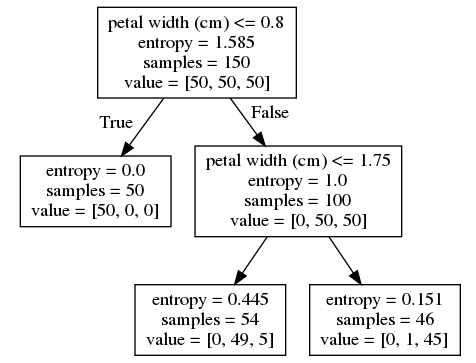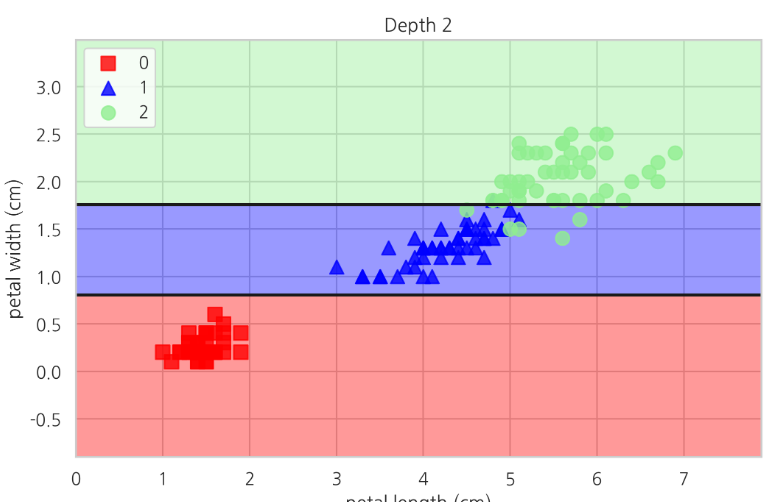

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import korean_language
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
help(iris)

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
x = iris.data[:,:2]
y = iris.target
feature_names = iris.feature_names[0:2]

In [12]:
x.shape, y.shape

((150, 2), (150,))

In [14]:
x[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [16]:
dt = DecisionTreeClassifier(max_depth=2)

In [17]:
dt.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [18]:
dt.score(x,y)

0.7733333333333333

In [28]:
!pip install graphviz
!pip install pydot


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### export_graphviz는 의사결정나무모델을 grphviz가 인식하는 데이터로 변환 
#### - export_graphviz(모델명, 변환한데이터 출력파일, 독립변수명, 타겟변수명, 배경색 채움)
--- 
### graphviz가 오작동하면 https://graphviz.org/download/에 들어가서 graphviz-9.0.0 (64-bit) EXE installer [sha256]를 다운받아 설치한다
#### - 설치 후 설치경로를 지정해준다
#### - import os
#### - os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [43]:
# 의사결정나무모델을 grphviz가 인식하는 데이터로 변환
from sklearn.tree import export_graphviz
import graphviz

In [44]:
import os

In [47]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [39]:
export_graphviz(dt, 
                out_file='./iris.dot',
                feature_names=iris.feature_names[:2],
                class_names=iris.target_names,
                filled=True)

In [40]:
with open('./iris.dot') as f:
    #dot_graph = str(open('./iris.dot', 'rb').read(), 'utf8')
    dot_graph = f.read()
    

In [41]:
dot_graph

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="sepal length (cm) <= 5.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]\\nclass = setosa", fillcolor="#ffffff"] ;\n1 [label="sepal width (cm) <= 2.8\\ngini = 0.237\\nsamples = 52\\nvalue = [45, 6, 1]\\nclass = setosa", fillcolor="#e99457"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.449\\nsamples = 7\\nvalue = [1, 5, 1]\\nclass = versicolor", fillcolor="#7beeab"] ;\n1 -> 2 ;\n3 [label="gini = 0.043\\nsamples = 45\\nvalue = [44, 1, 0]\\nclass = setosa", fillcolor="#e6843d"] ;\n1 -> 3 ;\n4 [label="sepal length (cm) <= 6.15\\ngini = 0.546\\nsamples = 98\\nvalue = [5, 44, 49]\\nclass = virginica", fillcolor="#f3edfd"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.508\\nsamples = 43\\nvalue = [5, 28, 10]\\nclass = versicolor", fillcolor="#93f1ba"] ;\n4 -> 5 ;\n6 [label="gin

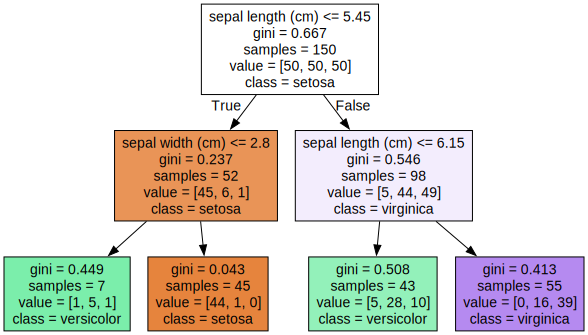

In [50]:
graphviz.Source(dot_graph)

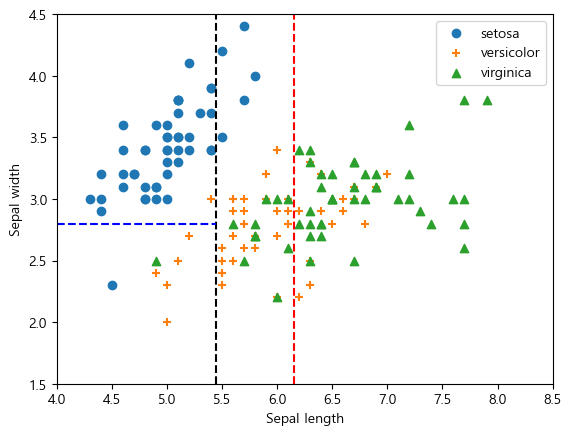

In [56]:
plt.xlim(4,8.5)
plt.ylim(1.5,4.5)
markers = ['o','+','^']

for i in range(3):
    xs = x[:,0][y==i]
    ys = x[:,1][y==i]
    plt.scatter(xs, ys, marker = markers[i])
    
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

xx = np.linspace(5.45,5.45,20)
yy = np.linspace(1.5,4.5,20)
plt.plot(xx,yy,'--k')

xx = np.linspace(4,5.45,20)
yy = np.linspace(2.8,2.8,20)
plt.plot(xx,yy,'--b')


xx = np.linspace(6.15,6.15,20)
yy = np.linspace(1.5,4.5,20)
plt.plot(xx,yy,'--r')

In [59]:
dt.predict([[5.5,4]])

array([1])

In [177]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

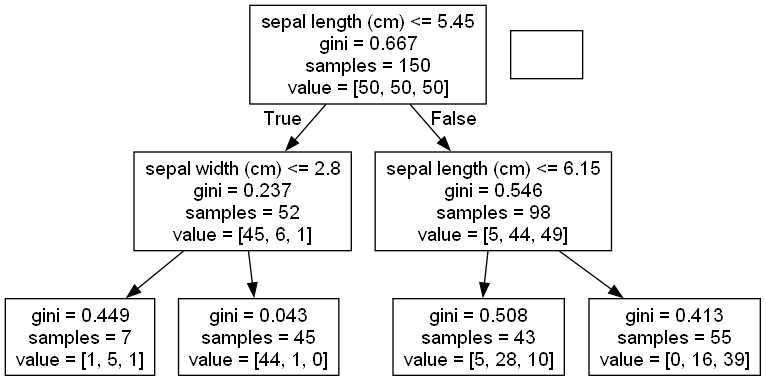

In [49]:
draw_decision_tree(dt)

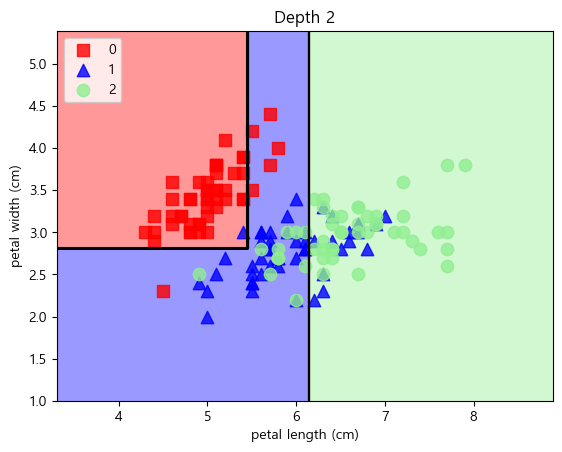

In [67]:
plot_decision_regions(x, y, dt, "Depth 2")
plt.show()

In [68]:
from sklearn.datasets import load_breast_cancer

In [69]:
cancer = load_breast_cancer()

In [70]:
train_x, test_x, train_y, test_y = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=9)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((426, 30), (143, 30), (426,), (143,))

In [71]:
dt_can = DecisionTreeClassifier()

In [72]:
dt_can.fit(train_x, train_y)

DecisionTreeClassifier()

In [73]:
dt_can.score(test_x, test_y)

0.916083916083916

In [83]:
feature_dict = dict(zip(cancer.feature_names,dt_can.feature_importances_.round(4)[:10]))

In [113]:
feature_df = pd.DataFrame(list(feature_dict.items()), columns=['Feature', 'Importance'])
feature_df

,Feature,Importance
0,mean radius,0.0000
1,mean texture,0.0417
2,mean perimeter,0.0050
3,mean area,0.0000
4,mean smoothness,0.0000
5,mean compactness,0.0000
6,mean concavity,0.0000
7,mean concave points,0.0293
8,mean symmetry,0.0064
9,mean fractal dimension,0.0000


In [114]:
feature_df= feature_df.sort_values(by='Importance',ascending=False)

Text(0, 0.5, 'Importance')

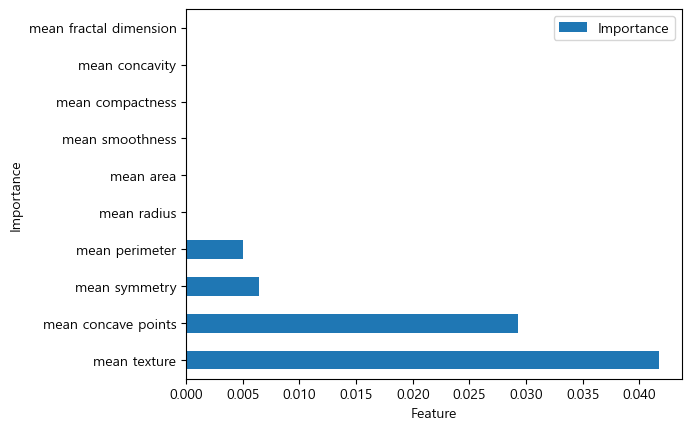

In [117]:
# 'Feature' 열을 인덱스로 설정
feature_df = feature_df.set_index('Feature')

# 막대 그래프 그리기
feature_df.plot(kind='barh')
plt.xlabel('Feature')
plt.ylabel('Importance')

In [118]:
feature_df

,Importance
Feature,
mean texture,0.0417
mean concave points,0.0293
mean symmetry,0.0064
mean perimeter,0.0050
mean radius,0.0000
mean area,0.0000
mean smoothness,0.0000
mean compactness,0.0000
mean concavity,0.0000


In [124]:
train = pd.read_csv('./titanic_train.csv', index_col=['PassengerId'])
test = pd.read_csv('./titanic_test.csv', index_col=['PassengerId'])

In [122]:
train.shape

(891, 11)

In [123]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train['Sex_encode'] = train['Sex'].apply(lambda x : 0 if x =='male' else 1)


In [132]:
train[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [131]:
test['Sex_encode'] = test['Sex'].apply(lambda x : 0 if x == 'male' else 1)

In [133]:
test[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


In [135]:
test.isnull().sum()

Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Sex_encode      0
dtype: int64

In [145]:
test[pd.isnull(test['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [150]:
test[test['Fare'].isnull()==True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [151]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [139]:
train['Fare'].mean().round(3)

32.204

In [152]:
test['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [153]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


In [156]:
train_eb = pd.get_dummies(train['Embarked'], prefix='Embarked')
test_eb = pd.get_dummies(test['Embarked'], prefix='Embarked')

In [159]:
train = pd.concat([train,train_eb],axis=1)
test = pd.concat([test,test_eb],axis=1)
train.head(), test.head()

(             Survived  Pclass  \
 PassengerId                     
 1                   0       3   
 2                   1       1   
 3                   1       3   
 4                   1       1   
 5                   0       3   
 
                                                           Name     Sex   Age  \
 PassengerId                                                                    
 1                                      Braund, Mr. Owen Harris    male  22.0   
 2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
 3                                       Heikkinen, Miss. Laina  female  26.0   
 4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
 5                                     Allen, Mr. William Henry    male  35.0   
 
              SibSp  Parch            Ticket     Fare Cabin Embarked  \
 PassengerId                                                           
 1                1      0         A/5 21171   

In [160]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [161]:
feature_names = ['Pclass','Sex_encode','Embarked_C','Embarked_Q','Embarked_S']

In [163]:
train_x = train[feature_names]

In [164]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      891 non-null    int64
 1   Sex_encode  891 non-null    int64
 2   Embarked_C  891 non-null    uint8
 3   Embarked_Q  891 non-null    uint8
 4   Embarked_S  891 non-null    uint8
dtypes: int64(2), uint8(3)
memory usage: 23.5 KB


In [165]:
train_y = train['Survived']

In [167]:
model = DecisionTreeClassifier(max_depth=2, random_state=7)

In [169]:
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2, random_state=7)

In [171]:
export_graphviz(model,
                feature_names = feature_names,
                class_names=['Survived','Perish'],
                out_file='./titanic_train.dot')

In [172]:
with open('./titanic_train.dot') as f:
    dot_graph = f.read()

In [173]:
dot_graph

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Sex_encode <= 0.5\\ngini = 0.473\\nsamples = 891\\nvalue = [549, 342]\\nclass = Survived"] ;\n1 [label="Pclass <= 1.5\\ngini = 0.306\\nsamples = 577\\nvalue = [468, 109]\\nclass = Survived"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.466\\nsamples = 122\\nvalue = [77, 45]\\nclass = Survived"] ;\n1 -> 2 ;\n3 [label="gini = 0.242\\nsamples = 455\\nvalue = [391, 64]\\nclass = Survived"] ;\n1 -> 3 ;\n4 [label="Pclass <= 2.5\\ngini = 0.383\\nsamples = 314\\nvalue = [81, 233]\\nclass = Perish"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.1\\nsamples = 170\\nvalue = [9, 161]\\nclass = Perish"] ;\n4 -> 5 ;\n6 [label="gini = 0.5\\nsamples = 144\\nvalue = [72, 72]\\nclass = Survived"] ;\n4 -> 6 ;\n}'

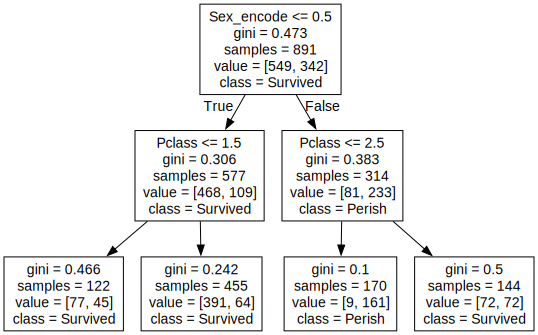

In [174]:
graphviz.Source(dot_graph)

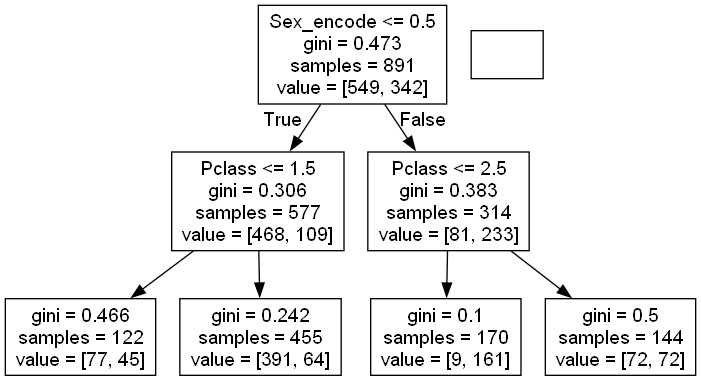

In [178]:
draw_decision_tree(model)

In [181]:
test_x = test[feature_names]
test_x.shape

(418, 5)

In [184]:
train_x.head()

,Pclass,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,
1,3,0,0,0,1
2,1,1,1,0,0
3,3,1,0,0,1
4,1,1,0,0,1
5,3,0,0,0,1


In [186]:
pred = model.predict(test_x)

In [187]:
test_x['pred_Survived'] = pred

C:\Users\lj040\AppData\Local\Temp\ipykernel_15328\3924751411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred_Survived'] = pred


In [190]:
test_x[:20]

,Pclass,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,pred_Survived
PassengerId,,,,,,
892,3,0,0,1,0,0
893,3,1,0,0,1,0
894,2,0,0,1,0,0
895,3,0,0,0,1,0
896,3,1,0,0,1,0
897,3,0,0,0,1,0
898,3,1,0,1,0,0
899,2,0,0,0,1,0
900,3,1,1,0,0,0


### Kaggle에 답안 제출하는 방법 
#### - !curl -L https://bit.ly/2KvK3k4 -o titanic_gender_submission.csv 파일다운받기를 하면 실행위치에 파일이 저장된다

In [194]:
!curl -L https://bit.ly/2KvK3k4 -o titanic_gender_submission.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   163    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100    75    0    75    0     0     75      0 --:--:-- --:--:-- --:--:--    75

100   297  100   297    0     0    191      0  0:00:01  0:00:01 --:--:--   191
100   297  100   297    0     0    191      0  0:00:01  0:00:01 --:--:--     0

100  3258  100  3258    0     0   1570      0  0:00:02  0:00:02 --:--:--  1570


In [195]:
submission = pd.read_csv('./titanic_gender_submission.csv')

In [196]:
submission.shape

(418, 2)

In [198]:
submission[:20]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
